# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Angeline Lydia Kojansow
- **Email:** kojansowlydia093@unsrat.ac.id
- **ID Dicoding:** flydevilz

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Berapakah rata-rata rating yang diterima jika barang dikirim tepat waktu?
- Pertanyaan 2:
Berapakah rata-rata jumlah transaksi untuk konsumen yang membayar menggunakan metode pembayaran credit card, boleto, dan lainnya?

## Import Semua Packages/Library yang Digunakan

In [99]:
!pip install kaggle
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [100]:
!cp kaggle.json ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [102]:
!kaggle datasets download -d olistbr/brazilian-ecommerce -f olist_order_reviews_dataset.csv
!unzip /content/olist_order_reviews_dataset.csv.zip

olist_order_reviews_dataset.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  /content/olist_order_reviews_dataset.csv.zip
replace olist_order_reviews_dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [103]:
!kaggle datasets download -d olistbr/brazilian-ecommerce -f olist_orders_dataset.csv
!unzip /content/olist_orders_dataset.csv.zip

olist_orders_dataset.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  /content/olist_orders_dataset.csv.zip
replace olist_orders_dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [104]:
!kaggle datasets download -d olistbr/brazilian-ecommerce -f olist_order_payments_dataset.csv
!unzip /content/olist_order_payments_dataset.csv.zip

olist_order_payments_dataset.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  /content/olist_order_payments_dataset.csv.zip
replace olist_order_payments_dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [105]:
review = pd.read_csv('/content/olist_order_reviews_dataset.csv')
order = pd.read_csv('/content/olist_orders_dataset.csv')
payment = pd.read_csv('/content/olist_order_payments_dataset.csv')

### Assessing Data

In [106]:
payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [107]:
payment.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [108]:
payment.duplicated().sum()

0

In [109]:
payment['payment_type'].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

In [110]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [111]:
order.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [112]:
order.duplicated().sum()

0

In [113]:
order['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [114]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [115]:
review.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [116]:
review.duplicated().sum()

0

In [117]:
review['review_score'].unique()

array([4, 5, 1, 3, 2])

### Cleaning Data

Cleaning Tabel Payment

In [118]:
payment['payment_value'].describe()
# outlier terlalu besar

count    103886.000000
mean        154.100380
std         217.494064
min           0.000000
25%          56.790000
50%         100.000000
75%         171.837500
max       13664.080000
Name: payment_value, dtype: float64

In [119]:
# identify outlier dari payment
q3 = payment['payment_value'].quantile(0.75)
q1 = payment['payment_value'].quantile(0.25)
iqr = q3 - q1

batas_atas = q3 + (1.5 * iqr)

print(f'iqr: {iqr}\nbatas_atas: {batas_atas}')

iqr: 115.04750000000001
batas_atas: 344.40875000000005


In [120]:
# filter outlier dan jenis pembayaran hanya 1
outlier_mask = (payment['payment_value'] > batas_atas)

# filter dataframe
payment_clean = payment[~outlier_mask]
payment_clean = payment_clean[(payment['payment_sequential'] == 1) & ~(payment['payment_type'] == 'not_defined')]

<ipython-input-120-8d85d915fdce>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  payment_clean = payment_clean[(payment['payment_sequential'] == 1) & ~(payment['payment_type'] == 'not_defined')]


In [121]:
# hapus kolom yang tidak dibutuhkan
hapus1 = ['payment_sequential', 'payment_installments']
payment_clean = payment_clean.drop(columns= hapus1)

In [122]:
payment_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91454 entries, 0 to 103885
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       91454 non-null  object 
 1   payment_type   91454 non-null  object 
 2   payment_value  91454 non-null  float64
dtypes: float64(1), object(2)
memory usage: 2.8+ MB


In [123]:
payment_clean.head()

,order_id,payment_type,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,credit_card,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,credit_card,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,credit_card,65.71
3,ba78997921bbcdc1373bb41e913ab953,credit_card,107.78
4,42fdf880ba16b47b59251dd489d4441a,credit_card,128.45


Cleaning Tabel Review

In [124]:
# hapus kolom yang tidak dibutuhkan
hapus2 = ['review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp']
review_clean = review.drop(columns= hapus2)

In [125]:
review_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   review_id     99224 non-null  object
 1   order_id      99224 non-null  object
 2   review_score  99224 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.3+ MB


In [126]:
review_clean.head()

,review_id,order_id,review_score
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5


Cleaning Tabel Order

In [127]:
# hapus kolom yang tidak dibutuhkan
hapus3 = ['order_purchase_timestamp', 'order_approved_at','order_delivered_carrier_date']
order_clean = order.drop(columns= hapus3)

In [128]:
# memfilter hanya barang yang sudah dikirim saja
order_clean = order_clean[order_clean['order_status'] == 'delivered']

In [129]:
# mengubah tipe data datetime menjadi date
order_clean['order_delivered_customer_date'] = pd.to_datetime(order_clean['order_delivered_customer_date']).dt.date
order_clean['order_estimated_delivery_date'] = pd.to_datetime(order_clean['order_estimated_delivery_date']).dt.date

In [130]:
# menambahkan kolom note untuk mengetahui apakah pengiriman tepat waktu atau delay
order_clean['note'] = order_clean.apply(lambda row: 'on time' if row['order_estimated_delivery_date'] > row['order_delivered_customer_date'] else 'delayed', axis=1)

<ipython-input-130-24b342dd8b4f>:2: FutureWarning: Comparison of NaT with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable.
  order_clean['note'] = order_clean.apply(lambda row: 'on time' if row['order_estimated_delivery_date'] > row['order_delivered_customer_date'] else 'delayed', axis=1)


In [131]:
order_status_counts = order_clean['order_status'].value_counts()

print(order_status_counts)

delivered    96478
Name: order_status, dtype: int64


In [132]:
# menghapus kolom yang masih ada nilai null
order_clean = order_clean.dropna()

In [133]:
order_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96470 entries, 0 to 99440
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96470 non-null  object
 1   customer_id                    96470 non-null  object
 2   order_status                   96470 non-null  object
 3   order_delivered_customer_date  96470 non-null  object
 4   order_estimated_delivery_date  96470 non-null  object
 5   note                           96470 non-null  object
dtypes: object(6)
memory usage: 5.2+ MB


In [134]:
order_clean.head()

,order_id,customer_id,order_status,order_delivered_customer_date,order_estimated_delivery_date,note
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-10,2017-10-18,on time
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-08-07,2018-08-13,on time
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-17,2018-09-04,on time
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-12-02,2017-12-15,on time
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-16,2018-02-26,on time


Merging Table

In [135]:
# menggabungkan tabel order dan payment
order_payment = order_clean.merge(payment_clean, on= 'order_id', how = 'inner')

In [136]:
# menggabungkan tabel order, payment, dan review
full = order_payment.merge(review_clean, on= 'order_id', how = 'inner')

In [137]:
full.head()

,order_id,customer_id,order_status,order_delivered_customer_date,order_estimated_delivery_date,note,payment_type,payment_value,review_id,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-10,2017-10-18,on time,credit_card,18.12,a54f0611adc9ed256b57ede6b6eb5114,4
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-08-07,2018-08-13,on time,boleto,141.46,8d5266042046a06655c8db133d120ba5,4
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-17,2018-09-04,on time,credit_card,179.12,e73b67b67587f7644d5bd1a52deb1b01,5
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-12-02,2017-12-15,on time,credit_card,72.20,359d03e676b3c069f62cadba8dd3f6e8,5
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-16,2018-02-26,on time,credit_card,28.62,e50934924e227544ba8246aeb3770dd4,5


In [138]:
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88748 entries, 0 to 88747
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       88748 non-null  object 
 1   customer_id                    88748 non-null  object 
 2   order_status                   88748 non-null  object 
 3   order_delivered_customer_date  88748 non-null  object 
 4   order_estimated_delivery_date  88748 non-null  object 
 5   note                           88748 non-null  object 
 6   payment_type                   88748 non-null  object 
 7   payment_value                  88748 non-null  float64
 8   review_id                      88748 non-null  object 
 9   review_score                   88748 non-null  int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 7.4+ MB


In [139]:
print(full.columns)

Index(['order_id', 'customer_id', 'order_status',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'note', 'payment_type', 'payment_value', 'review_id', 'review_score'],
      dtype='object')


In [140]:
full.to_csv('full.csv', index=False)

## Exploratory Data Analysis (EDA)

In [141]:
full['review_score'].describe()

count    88748.000000
mean         4.168263
std          1.271713
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: review_score, dtype: float64

Dari insight di atas mengenai rating product diatas dapat diketahui bahwa rata-rata rating yang diterima adalah 4.1

### Analisis Distribusi


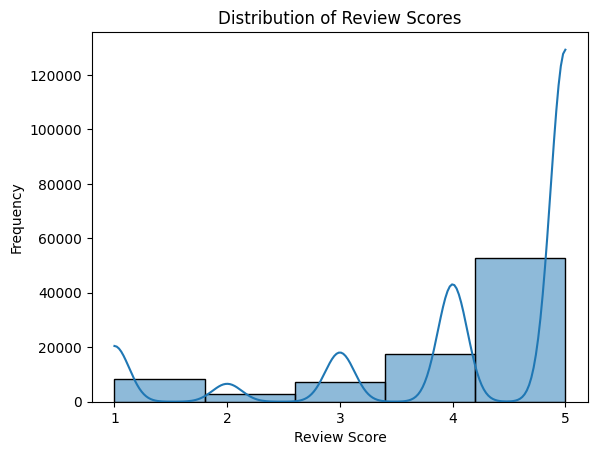

In [142]:
sns.histplot(data=full, x='review_score', bins=5, kde=True)
plt.xticks(ticks=range(1, 6), labels=range(1, 6))
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Frequency')
plt.show()

Dari histogram di atas dapat disimpulkan bahwa banyak order mendapatkan rating 5.

In [143]:
full['payment_value'].describe()

count    88748.00000
mean       112.70292
std         72.17037
min          0.01000
25%         56.79000
50%         95.00000
75%        153.32000
max        344.34000
Name: payment_value, dtype: float64

### Analisis Korelasi

<ipython-input-144-7a2ba9e3c728>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = full.corr()


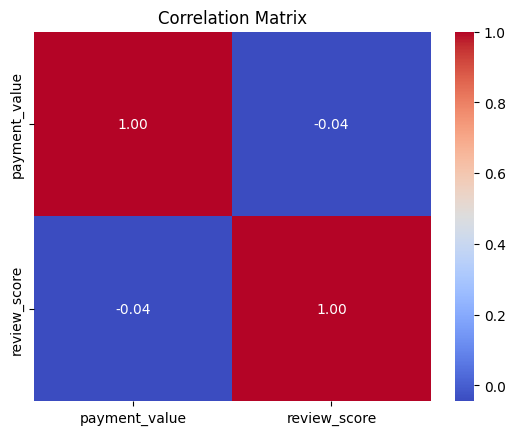

In [144]:
correlation_matrix = full.corr()

# Plotting the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


Dari heatmap di atas dapat disimpulkan bahwa tidak ada korelasi antara rating yang didapatkan dengan jumlah transaksi yang dilakukan oleh pembeli.

### Transaksi per bulan

In [145]:
full['month'] = pd.to_datetime(full['order_delivered_customer_date'], format='%Y-%m-%d').dt.month

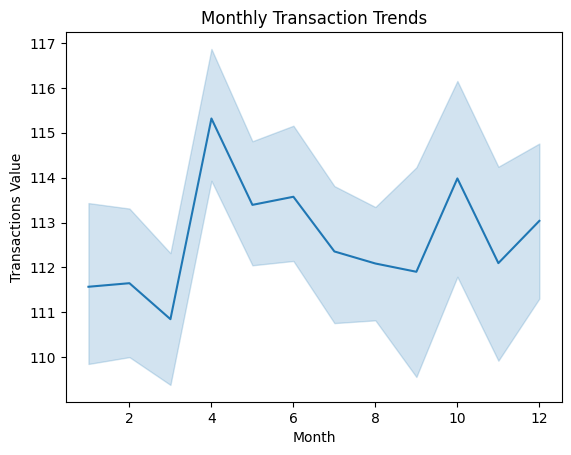

In [146]:
sns.lineplot(data=full, x='month', y='payment_value')
plt.title('Monthly Transaction Trends')
plt.xlabel('Month')
plt.ylabel('Transactions Value')
plt.show()

Dari line chart di atas bisa disimpulkan bahwa rata-rata transaksi terbanyak dilakukan bulan April setiap tahunnya, dan terendah di bulan Maret.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [147]:
note_counts = full['note'].value_counts()

print(note_counts)

on time    81753
delayed     6995
Name: note, dtype: int64


In [148]:
review_counts = full['review_score'].value_counts()

print(review_counts)

5    52740
4    17593
1     8354
3     7377
2     2684
Name: review_score, dtype: int64


In [149]:
hasil_review = full.groupby('note')['review_score'].agg('mean')

In [150]:
hasil_review

note
delayed    2.578842
on time    4.304258
Name: review_score, dtype: float64

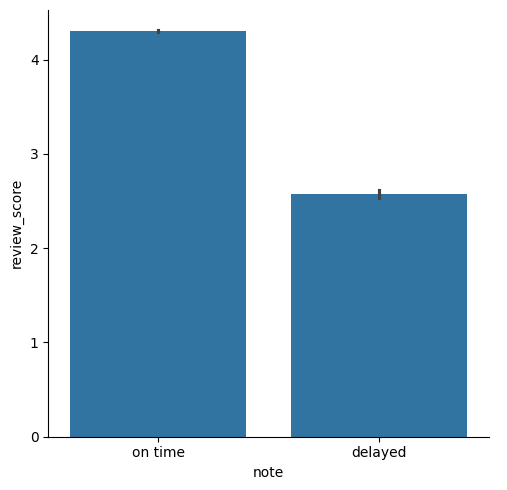

In [151]:
sns.catplot(x='note', y='review_score', data=full, kind='bar')

### Pertanyaan 2:

In [152]:
paytype_counts = full['payment_type'].value_counts()

print(paytype_counts)

credit_card    67969
boleto         17957
voucher         1463
debit_card      1359
Name: payment_type, dtype: int64


Text(0.5, 1.05, 'Banyak Pengguna Setiap Metode Pembayaran')

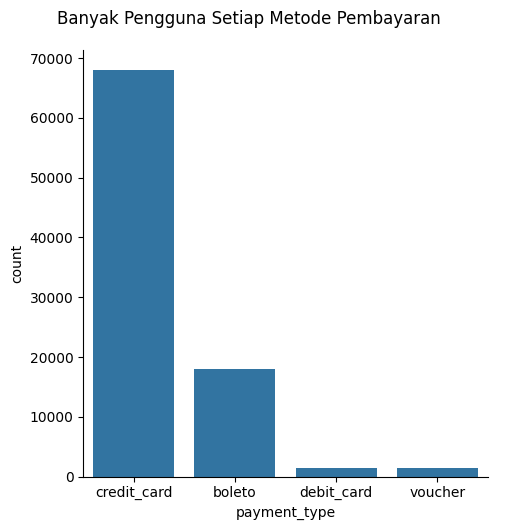

In [153]:
g = sns.catplot(x='payment_type', data=full, kind='count')
g.fig.suptitle('Banyak Pengguna Setiap Metode Pembayaran', y=1.05)

In [154]:
mean_payment_value = full.groupby('payment_type')['payment_value'].agg('mean')

In [155]:
# rata-rata jumlah transaksi dari setiap metode pembayaran
mean_payment_value

payment_type
boleto         106.722342
credit_card    115.297108
debit_card     104.301266
voucher         73.390998
Name: payment_value, dtype: float64

(array([0, 1, 2, 3]),
 [Text(0, 0, 'boleto'),
  Text(1, 0, 'credit_card'),
  Text(2, 0, 'debit_card'),
  Text(3, 0, 'voucher')])

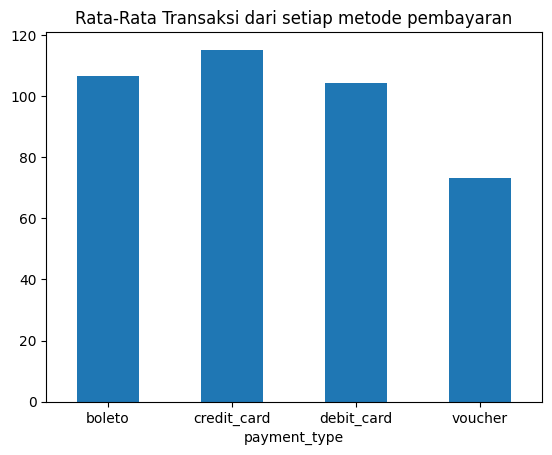

In [156]:
mean_payment_value.plot.bar()
plt.title('Rata-Rata Transaksi dari setiap metode pembayaran')
plt.xticks(rotation=0)

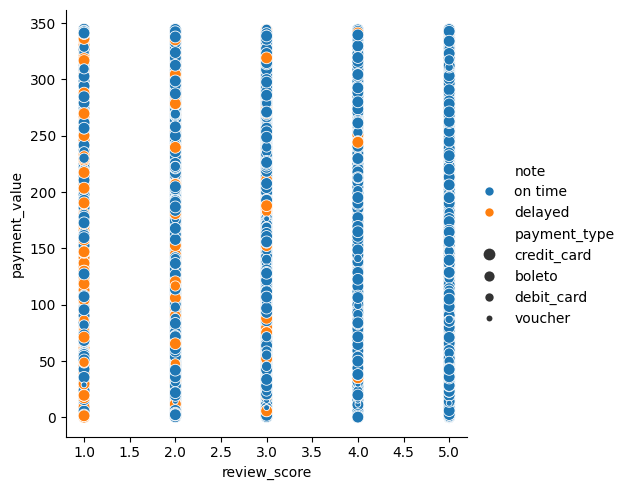

In [157]:
sns.relplot(x='review_score', y='payment_value', data=full, kind='scatter', hue='note', size= 'payment_type')

## Conclusion

- Conclution pertanyaan 1:
Rata-rata rating yang diterima pada pengiriman tepat waktu adalah 4,3. Sedangkan rating yang diterima pada pengiriman delay adalah 2,5. Hal ini menunjukkan bahwa ketepatan waktu dalam pengiriman barang dapat berdampak pada rating.


- Conclution pertanyaan 2: rata-rata jumlah transaksi terbanyak digunakan oleh metode pembayaran credit card sebanyak 115.2 dollar. Kemudian rata-rata transaksi terbesar kedua menggunakan metode boleto sebanyak 106.7 dollar, berbeda tipis dengan rata-rata transaksi menggunakan debit_card, yaitu sebanyak 104.3 dollar. Rata-rata transaksi paling sedikit menggunakan metode voucher, yaitu hanya senilai 73.3 dollar.